In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_datasets(filename, column_list, target_column):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    column_list - список назв колонок-характеристик
    target_column - назва колонки з цільовою величиною
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [4]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [5]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [6]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    std_n = np.copy(std)
    #std_n[std_n == 0] = 1
    X_new = (X - mean) / std
    return X_new, mean, std

In [96]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [8]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''

    h_thetha = np.dot(X, theta.T)
    
    return h_thetha

In [9]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    J = (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y)**2)
    
    return J

In [10]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    
    d_theta = (1/(np.shape(X)[0])) * np.dot(X.T, hypothesis(X,theta) - y).T
    
    return d_theta

In [11]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha * derivative(X, y, theta)
        J = cost_function(X, y, theta)
        delta = abs(J_history[-1] - J)

        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [12]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [38]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [39]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [81]:
all_col = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']

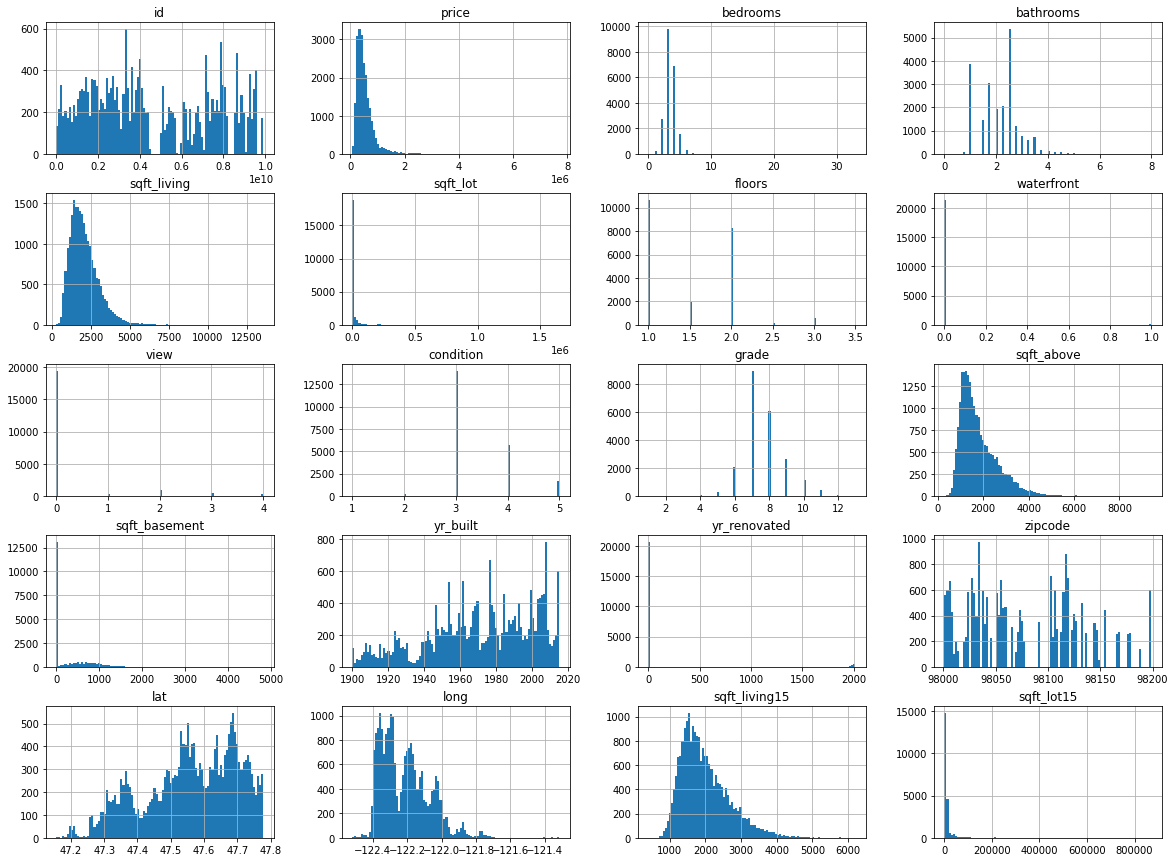

In [41]:

df.hist(bins = 100, figsize = (20,15))
plt.show()

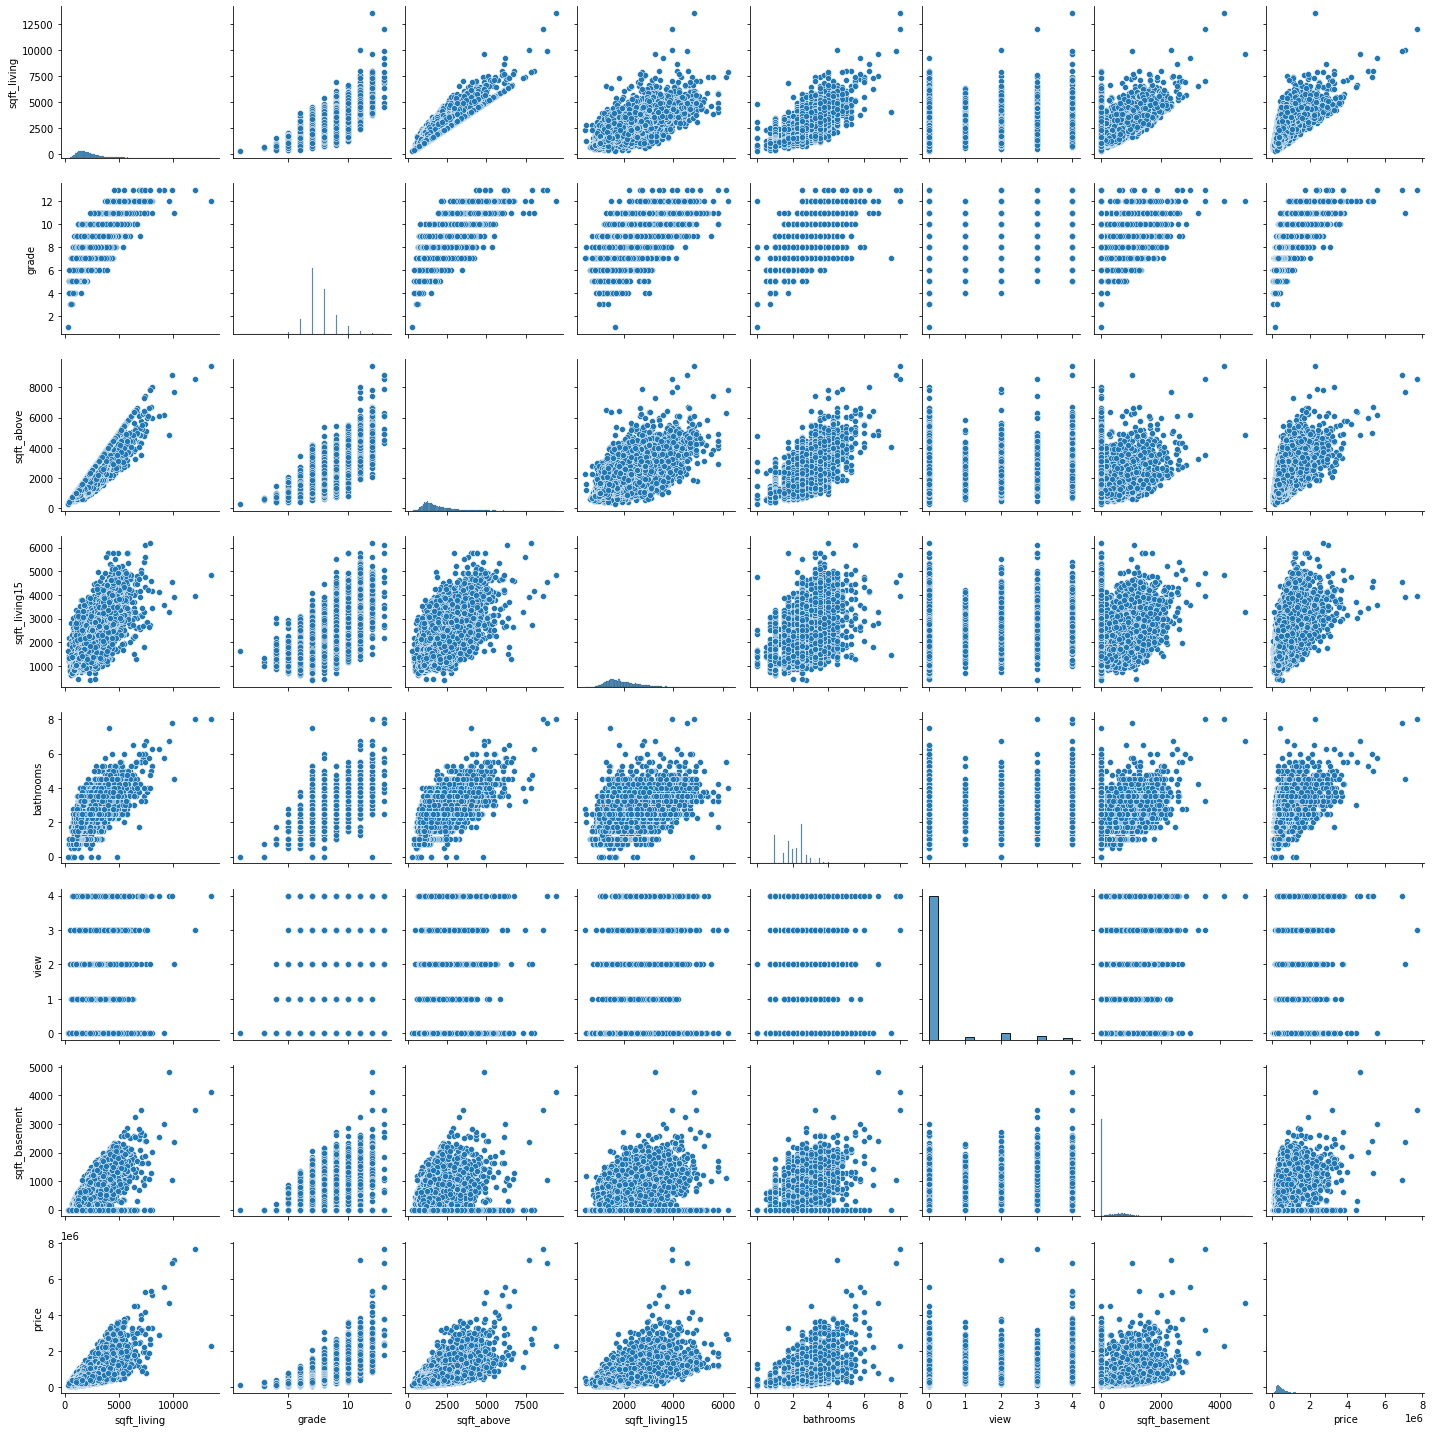

In [42]:
import seaborn as sns
cols = all_col[:7] + ['price']
sns.pairplot(df[cols])
plt.tight_layout()
plt.show()

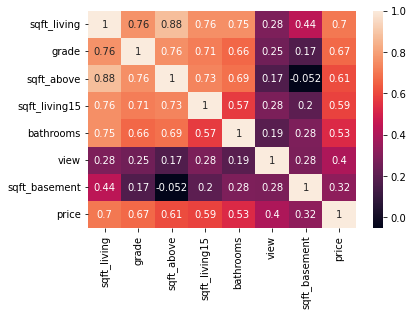

In [43]:
cm = df[cols].corr()
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                yticklabels = cols,
                xticklabels = cols)
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [82]:
X, y = df[all_col], df['price']
print('X shape = ',X.shape)
print('y shape = ', y.shape)
X

X shape =  (21613, 9)
y shape =  (21613,)


,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat
0,1180,7,1180,1340,1.00,0,0,3,47.5112
1,2570,7,2170,1690,2.25,0,400,3,47.7210
2,770,6,770,2720,1.00,0,0,2,47.7379
3,1960,7,1050,1360,3.00,0,910,4,47.5208
4,1680,8,1680,1800,2.00,0,0,3,47.6168
...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,1530,2.50,0,0,3,47.6993
21609,2310,8,2310,1830,2.50,0,0,4,47.5107
21610,1020,7,1020,1020,0.75,0,0,2,47.5944
21611,1600,8,1600,1410,2.50,0,0,3,47.5345


In [83]:
#X, mean, std = normalize(X)#
X = preprocessing.normalize(X)
X

array([[0.55121436, 0.00326992, 0.55121436, ..., 0.        , 0.00140139,
        0.02219395],
       [0.67885353, 0.00184902, 0.57319539, ..., 0.10565814, 0.00079244,
        0.01260528],
       [0.26277384, 0.00204759, 0.26277384, ..., 0.        , 0.00068253,
        0.01629126],
       ...,
       [0.57713593, 0.00396074, 0.57713593, ..., 0.        , 0.00113164,
        0.02692984],
       [0.60002837, 0.00300014, 0.60002837, ..., 0.        , 0.00112505,
        0.01782628],
       [0.57713593, 0.00396074, 0.57713593, ..., 0.        , 0.00113164,
        0.02692967]])

In [84]:

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)



# Sclearn regression

In [85]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [86]:
df_print = pd.DataFrame()
y_train_pred = regression.predict(X_train)

rel_diff = np.abs(np.divide(y_train - y_train_pred, y_train)) * 100
res = pd.DataFrame({'y_actual' : y_train, 'y_pred' : y_train_pred, 'err' : rel_diff})
res


,y_actual,y_pred,err
11042,506000.0,502696.436181,0.652878
10424,109000.0,85329.512276,21.716044
300,3075000.0,995246.682057,67.634254
17546,337000.0,709004.090393,110.386970
3046,386900.0,356123.125276,7.954736
...,...,...,...
18308,250000.0,352285.032891,40.914013
13545,896000.0,854912.577480,4.585650
2580,482000.0,708038.134572,46.895879
18948,910000.0,737076.778163,19.002552


In [87]:
MAE_sklearn = mean_absolute_error(y_train, y_train_pred)
MSE_sklearn = mean_squared_error(y_train, y_train_pred)
RMSE_sklearn = mean_squared_error(y_train, y_train_pred, squared = False)
print('MAE = ', MAE_sklearn, '\nMSE = ', MSE_sklearn, '\nRMSE = ', RMSE_sklearn)

MAE =  178896.7961057298 
MSE =  81033175630.90096 
RMSE =  284663.267090963


In [88]:
print(y_test.shape)
print(X_test.shape)
y_test_pred = regression.predict(X_test)

rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
res

(4323,)
(4323, 9)


,y_actual,y_pred,err
7897,367000.0,684728.642729,86.574562
13631,255000.0,308321.251061,20.910295
4575,362300.0,660869.061311,82.409346
12781,207000.0,-72631.476780,135.087670
9990,530000.0,468576.092847,11.589416
...,...,...,...
20688,485000.0,548622.691446,13.118081
16522,710000.0,513040.209542,27.740816
3299,921500.0,512751.241823,44.356892
19277,365000.0,393216.723591,7.730609


In [89]:
MAE_sklearn = mean_absolute_error(y_test, y_test_pred)
MSE_sklearn = mean_squared_error(y_test, y_test_pred)
RMSE_sklearn = mean_squared_error(y_test, y_test_pred, squared = False)
print('MAE = ', MAE_sklearn, '\nMSE = ', MSE_sklearn, '\nRMSE = ', RMSE_sklearn)

MAE =  183606.71649430008 
MSE =  93712260089.25261 
RMSE =  306124.5826281395


# Custom regression

In [97]:
X = prepare_X(X_train)

print('X: {}'.format(X_train.shape))
print('y: {}'.format(y_train.shape))
theta = np.zeros(X_train.shape[1])

X: (17290, 9)
y: (17290,)


In [98]:
alpha = 0.01
num_iters = 1500

In [101]:
#граgієнтний спуск
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, num_iters, False)

In [93]:

y_test_pred = hypothesis(X_test, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100


res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)

        y_actual         y_pred         err
7897    367000.0  535876.957639   46.015520
13631   255000.0  539950.128638  111.745148
4575    362300.0  544194.069754   50.205374
12781   207000.0  530509.501337  156.284783
9990    530000.0  532230.545161    0.420858
...          ...            ...         ...
20688   485000.0  539997.799101   11.339752
16522   710000.0  533771.326652   24.820940
3299    921500.0  540497.837003   41.345867
19277   365000.0  512678.253223   40.459795
1061   1035480.0  549203.227344   46.961484

[4323 rows x 3 columns]


In [100]:
MAE_c = mean_absolute_error(y_test, y_test_pred)
MSE_c = mean_squared_error(y_test, y_test_pred)
RMSE_c = mean_squared_error(y_test, y_test_pred, squared = False)

print('MAE custom = ', MAE_c, '   MAE scl = ', MAE_sklearn,
      '\nMSE custom = ', MSE_c,'   MSE scl = ', MSE_sklearn,
      '\nRMSE custom = ', RMSE_c, '   RMSE scl = ', RMSE_sklearn)

MAE custom =  232241.4266816768    MAE scl =  183606.71649430008 
MSE custom =  142540131689.48972    MSE scl =  93712260089.25261 
RMSE custom =  377544.87374283036    RMSE scl =  306124.5826281395
